In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
def add_layer(inputs , in_size , out_size , activation_function = None):
    W = tf.Variable(tf.random_normal([in_size , out_size]))
    b = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    linar = tf.matmul(inputs , W)+b
    
    if activation_function is None:
        result = linar
    else:
        result = activation_function(linar)
        
    return result

In [3]:
x_data = np.linspace(-1 , 1 , 300)[: , np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

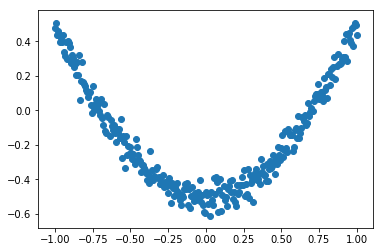

In [4]:
xs = tf.placeholder(tf.float32 , shape=[None , 1] )

l1 = add_layer(xs , 1 ,10  ,activation_function=tf.nn.relu)
prediction = add_layer(l1 , 10 ,1 ,activation_function=None)

#真实的label
ys = tf.placeholder(tf.float32 , shape=[None , 1] )

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction) , axis = 1))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#添加图形化显示
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data , y_data)

plt.ion()
plt.show(block = False)#show会暂停程序 使用ion就不会暂停的
#显示真实数据完毕

#print(sess.run(prediction , feed_dict={xs:x_data , ys:y_data}).shape)

for i in range(1000):
    sess.run(train_step , feed_dict={xs:x_data , ys:y_data})
    if i%50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        #print(sess.run(loss , feed_dict={xs:x_data , ys:y_data}))
        prediction_value = sess.run(prediction , feed_dict={xs:x_data})
        lines = ax.plot(x_data , prediction_value , 'r-' , lw=5)
        plt.pause(0.1)#暂停0.1s